# Introduction

Aquí vemos el test de Jarque-Bera desde cero. En en el camino entendemos los momentos de una distribución, vemos distribuciones chi-squared, aprendemos qué es el p-value y finalmente probamos nuestro test con varios vectores aleatorios simulados. Terminamos viendo que es posible que una distribución normal falle su test de normalidad.

El p-value es la probabilidad de hallar un valor más extremo del valor observado. el p-value es menor al nivel de significancia (0.05), entonces se rechaza $H$, donde $H$ es el evento de suponer que un vector aleatorio se distribuye como una normal distribution. Por lo tanto, lo que se busca es que p-value sea mayor que el nivel de significancia para que acepte la hipótesis $H$

## Goal

Create a normality test, e.g Jarque-Bera.

## Steps

### Step 1: Generate vector of IID random variables

### Step 2: Visualise histogram of random variables

### Step 3: Define what is the p-value

### Step 4: Perform a Jarque-Bera test

### Step 5: A normal distribution can fail its normality test

## Webs

https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test

https://en.wikipedia.org/wiki/Borel%E2%80%93Cantelli_lemma

https://en.wikipedia.org/wiki/P-value#:~:text=In%20statistical%20testing%2C%20the%20p,the%20null%20hypothesis%20is%20correct.

La equivalencia es H = {x es normal} o equivalentemente H = {jb es chi-squared de grado 2}

https://fractalvelvet.wordpress.com/page/2/


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy
import importlib
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, chi2

In [2]:
##generate random variable

x_size = 10**6
degrees_freedom = 2
type_random_variable = 'exponential' # normal exponential student chi-squared

if type_random_variable == 'normal':
    x = np.random.standard_normal(size = x_size)
    x_str = type_random_variable
elif type_random_variable == 'exponential':
    x = np.random.standard_exponential(size = x_size)
    x_str = type_random_variable
elif type_random_variable == 'student':
    x = np.random.standard_t(df=degrees_freedom, size = x_size)
    x_str = type_random_variable + ' (df=' + str(degrees_freedom) + ')'
elif type_random_variable == 'chi-squared':
    x = np.random.chisquare(df=degrees_freedom,size=x_size)
    x_str = type_random_variable + ' (df=' + str(degrees_freedom) + ')'

In [7]:
# compute "risk metrics"
    
x_mean = np.mean(x)
x_stdev = np.std(x)
x_skew = skew(x) #Integral del momento de orden 3
x_kurt = kurtosis(x) #excess kurtosis: kurtosis original-3 
#(la kurtosis de una variable aleatoria estándar es 3)
x_median = np.percentile(x, 50)
x_var_95 = np.percentile(x,5) # Solamente el 5% de los valores son maenores que el resultado de x_var_95
JB = x_size/6*(x_skew**2 + 1/4*x_kurt**2)
p_value = 1-chi2.cdf(JB, df=2) #Cuál es la probabiliad de tener puntos que caigan a la izquierda de dicho x_JB
is_normal = (p_value > 0.05) # equivalently JB < 6 for alpha =0.05

exponential
mean 0.9998850863026977
std 1.0002537546293824
skewness 2.007084848963475
kurtosis 6.084784773917896
VaR 95% 0.05110955832622391
x_JB 2214090.1711940835
p-value 0.0
is normal False


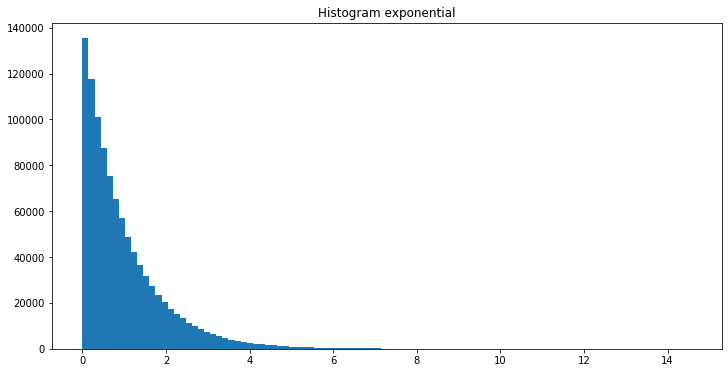

In [4]:
# print metrics
print(x_str)
print('mean ' + str(x_mean))
print('std ' + str(x_stdev))
print('skewness ' + str(x_skew))
print('kurtosis ' + str(x_kurt))
print('VaR 95% ' + str(x_var_95))
print('x_JB ' + str(JB))
print('p-value ' + str(p_value))
print('is normal ' + str(is_normal))

##plot histogram
plt.figure(figsize=(12,6)) #genera la figura
plt.hist(x,bins=100) #crea el histograma y bins adelgaza las "barritas"
plt.title('Histogram ' + x_str)
#plt.xlabel(plot_str)
plt.show() #muestra la figura

## Borel Cantelli theorem

En el test de Jarque Bera, implica que si corro dicho
test "n" veces, aún cuando la distribución es normal, habrá casos donde el test
fallará.

$P(\text{All tests are normal = True}) = 0$

normal
mean 0.0002413431076547708
std 1.0003224008565055
skewness -0.00366019638774943
kurtosis 0.0022996478687131727
VaR 95% -1.6445047488733338
x_JB 2.4531887794855387
p-value 0.2932897092385094
is normal True


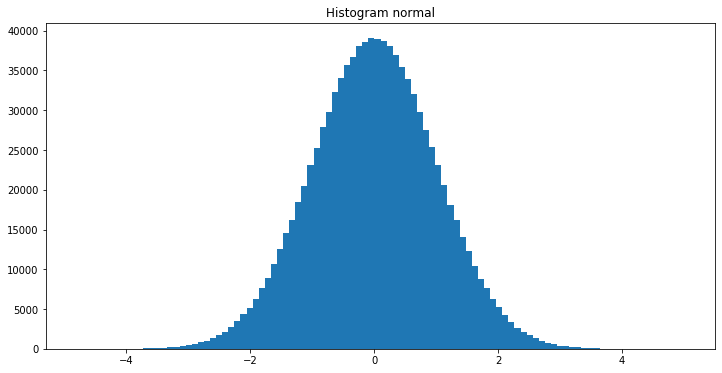

counter 1
--------
normal
mean -0.0016142135144540746
std 0.999396915409673
skewness 0.0023389489813698244
kurtosis -0.005066512177054783
VaR 95% -1.6433851453241792
x_JB 1.9813447912520061
p-value 0.37132692845931514
is normal True


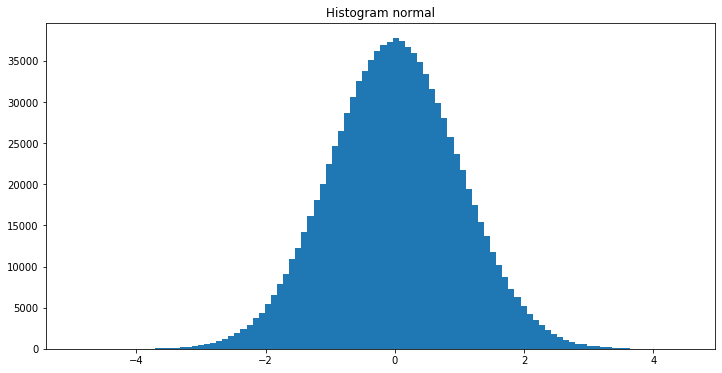

counter 2
--------
normal
mean 0.00012394901966299862
std 1.0004391458642072
skewness 0.0030875302817891886
kurtosis -0.006949391322769838
VaR 95% -1.6431022042647587
x_JB 3.6010588633687344
p-value 0.16521139691514986
is normal True


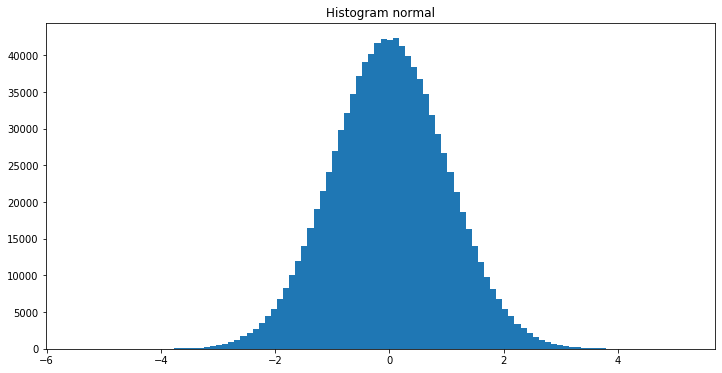

counter 3
--------


In [9]:
is_normal = True
counter = 0
while is_normal and counter < 3:
    
    ##generate random variable
    
    x_size = 10**6
    degrees_freedom = 2
    type_random_variable = 'normal' # normal exponential student chi-squared
    
    if type_random_variable == 'normal':
        x = np.random.standard_normal(size = x_size)
        x_str = type_random_variable
    elif type_random_variable == 'exponential':
        x = np.random.standard_exponential(size = x_size)
        x_str = type_random_variable
    elif type_random_variable == 'student':
        x = np.random.standard_t(df=degrees_freedom, size = x_size)
        x_str = type_random_variable + ' (df=' + str(degrees_freedom) + ')'
    elif type_random_variable == 'chi-squared':
        x = np.random.chisquare(df=degrees_freedom,size=x_size)
        x_str = type_random_variable + ' (df=' + str(degrees_freedom) + ')'
 
    # compute "risk metrics"
        
    x_mean = np.mean(x)
    x_stdev = np.std(x)
    x_skew = skew(x) #Integral del momento de orden 3
    x_kurt = kurtosis(x) #excess kurtosis: kurtosis original-3 
    #(la kurtosis de una variable aleatoria estándar es 3)
    x_median = np.percentile(x, 50)
    x_var_95 = np.percentile(x,5) # Solamente el 5% de los valores son maenores que el resultado de x_var_95
    JB = x_size/6*(x_skew**2 + 1/4*x_kurt**2)
    p_value = 1-chi2.cdf(JB, df=2) #Cuál es la probabiliad de tener puntos que caigan a la izquierda de dicho x_JB
    is_normal = (p_value > 0.05) # equivalently JB < 6
    
    # print metrics
    print(x_str)
    print('mean ' + str(x_mean))
    print('std ' + str(x_stdev))
    print('skewness ' + str(x_skew))
    print('kurtosis ' + str(x_kurt))
    print('VaR 95% ' + str(x_var_95))
    print('x_JB ' + str(JB))
    print('p-value ' + str(p_value))
    print('is normal ' + str(is_normal))
    
    ##plot histogram
    
    plt.figure(figsize=(12,6)) #genera la figura
    plt.hist(x,bins=100) #crea el histograma y bins adelgaza las "barritas"
    plt.title('Histogram ' + x_str)
    #plt.xlabel(plot_str)
    plt.show() #muestra la figura
    
    counter+=1
    print('counter ' + str(counter))
    print('--------')